In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
# from sklearn.neighbors import KernelDensity
import colorcet as cc

In [109]:
# from dask.distributed import Client
# client = Client(n_workers=2, threads_per_worker=2, memory_limit='10GB')
# client

/Users/brianpm/anaconda3/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52839 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:52840 Dashboard: http://127.0.0.1:52839/status,Cluster Workers: 2 Cores: 4 Memory: 20.00 GB


In [44]:
dataloc = Path("/Volumes/Glyph6TB/CMIP6")
models = ["CESM2", "IPSL-CM6A-LR", "CNRM-CM6-1", 'MRI-ESM2-0']
experiments = ["amip", "amip-lwoff", "aqua-control", "aqua-control-lwoff"]

In [43]:
# assign colors by model:
clrs = dict()
for i,m in enumerate(models):
    clrs[m] = f"C{i}"

def select_color(m):
    for i in models:
        if i in m:
            return clrs[i]
    print(f"No color selected for {m}")
    return "gray"
    
# and then assign same colors to other keys
clrs2 = dict()
for m in models:
    for ex in experiments:
        clrs2[f"{m}-{ex}"] = clrs[m]

In [45]:
# make a second structure to hold the amip runs
# - Experiment
#   |_ Model
#     |_ Member
#        |_dataset
# there are multiple ensemble members, so need to account for them
#pr_day_CESM2_amip_r4i1p1f1_gn_19700101-19791231.n

#
# K is the dict of datasets
#
K = dict()
for ex in experiments:
    K[ex] = dict()
    for m in models:
        fils = sorted(list(dataloc.glob(f"pr_day_{m}_{ex}_*.nc")))
        # only add an entry if there is something:
        if len(fils) == 0:
            continue
        K[ex][m] = dict()
        # search for files:
        # find out if there are multiple ensemble members:
        members = set([f.name.split("_")[4] for f in fils])
        print(f"{ex} / {m} : {len(members)} members.")
        for b in members:
            mfils = sorted(list(dataloc.glob(f"pr_day_{m}_{ex}_{b}_*.nc")))
            if len(mfils) == 1:
                K[ex][m][b] = xr.open_dataset(mfils[0])
            elif len(mfils) > 1:
                # print(f"There are {len(mfils)} files for this member.")
                K[ex][m][b] = xr.open_mfdataset(mfils, combine='by_coords')
            else:
                print(f"Sorry, failed to find files for {m}, {ex}")

amip / CESM2 : 10 members.


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, dec

amip / IPSL-CM6A-LR : 11 members.
amip / CNRM-CM6-1 : 1 members.
amip / MRI-ESM2-0 : 3 members.
amip-lwoff / CESM2 : 1 members.


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


amip-lwoff / IPSL-CM6A-LR : 1 members.
amip-lwoff / CNRM-CM6-1 : 1 members.
amip-lwoff / MRI-ESM2-0 : 1 members.
aqua-control / CESM2 : 1 members.
aqua-control / IPSL-CM6A-LR : 1 members.


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


aqua-control / CNRM-CM6-1 : 1 members.
aqua-control-lwoff / CESM2 : 1 members.
aqua-control-lwoff / IPSL-CM6A-LR : 1 members.


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


aqua-control-lwoff / CNRM-CM6-1 : 1 members.


In [46]:
#
# LAND - dict of land percentage
#
LAND = dict()
vname = "sftlf"
table = "fx"
for ex in experiments:
    LAND[ex] = dict()
    for m in models:
        LAND[ex][m] = dict()
        # search for files:
        fils = sorted(list(dataloc.glob(f"{vname}_{table}_{m}_{ex}_*.nc")))
        # find out if there are multiple ensemble members:
        members = set([f.name.split("_")[4] for f in fils])
        print(f"{m} Identified {len(members)} members.")
        for b in members:
            print(f"{m} : check member {b}")
            mfils = sorted(list(dataloc.glob(f"{vname}_{table}_{m}_{ex}_{b}_*.nc")))
            if len(mfils) == 1:
                LAND[ex][m][b] = xr.open_dataset(mfils[0])
            elif len(mfils) > 1:
                print(f"There are {len(mfils)} files for this member.")
                LAND[ex][m][b] = xr.open_mfdataset(mfils, combine='by_coords')
            else:
                print(f"Sorry, failed to find files for {m}, {ex}")

CESM2 Identified 10 members.
CESM2 : check member r1i1p1f1
CESM2 : check member r3i1p1f1
CESM2 : check member r5i1p1f1
CESM2 : check member r6i1p1f1
CESM2 : check member r10i1p1f1
CESM2 : check member r8i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


CESM2 : check member r4i1p1f1
CESM2 : check member r9i1p1f1
CESM2 : check member r2i1p1f1
CESM2 : check member r7i1p1f1
IPSL-CM6A-LR Identified 21 members.
IPSL-CM6A-LR : check member r6i1p1f1
IPSL-CM6A-LR : check member r15i1p1f1
IPSL-CM6A-LR : check member r13i1p1f1
IPSL-CM6A-LR : check member r8i1p1f1
IPSL-CM6A-LR : check member r17i1p1f1
IPSL-CM6A-LR : check member r18i1p1f1
IPSL-CM6A-LR : check member r2i1p1f1
IPSL-CM6A-LR : check member r20i1p1f1
IPSL-CM6A-LR : check member r5i1p1f1
IPSL-CM6A-LR : check member r19i1p1f1
IPSL-CM6A-LR : check member r11i1p1f1
IPSL-CM6A-LR : check member r12i1p1f1
IPSL-CM6A-LR : check member r16i1p1f1
IPSL-CM6A-LR : check member r1i1p1f1
IPSL-CM6A-LR : check member r3i1p1f1
IPSL-CM6A-LR : check member r10i1p1f1
IPSL-CM6A-LR : check member r4i1p1f1
IPSL-CM6A-LR : check member r14i1p1f1
IPSL-CM6A-LR : check member r9i1p1f1
IPSL-CM6A-LR : check member r21i1p1f1
IPSL-CM6A-LR : check member r7i1p1f1
CNRM-CM6-1 Identified 1 members.
CNRM-CM6-1 : check mem

In [47]:
# zonal average for each simulation
ZM = dict()
for ex in K:
    ZM[ex] = dict()
    for m in K[ex]:
        ZM[ex][m] = dict()
        for b in K[ex][m]:
            print(f"working on {ex} - {m} - {b}")
            ZM[ex][m][b] = (K[ex][m][b]['pr']*86400.).mean(dim=('time','lon')).compute()

working on amip - CESM2 - r1i1p1f1
working on amip - CESM2 - r3i1p1f1
working on amip - CESM2 - r5i1p1f1
working on amip - CESM2 - r6i1p1f1
working on amip - CESM2 - r10i1p1f1
working on amip - CESM2 - r8i1p1f1
working on amip - CESM2 - r4i1p1f1
working on amip - CESM2 - r9i1p1f1
working on amip - CESM2 - r2i1p1f1
working on amip - CESM2 - r7i1p1f1
working on amip - IPSL-CM6A-LR - r1i1p1f1
working on amip - IPSL-CM6A-LR - r3i1p1f1
working on amip - IPSL-CM6A-LR - r5i1p1f1
working on amip - IPSL-CM6A-LR - r6i1p1f1
working on amip - IPSL-CM6A-LR - r10i1p1f1
working on amip - IPSL-CM6A-LR - r8i1p1f1
working on amip - IPSL-CM6A-LR - r4i1p1f1
working on amip - IPSL-CM6A-LR - r9i1p1f1
working on amip - IPSL-CM6A-LR - r11i1p1f1
working on amip - IPSL-CM6A-LR - r2i1p1f1
working on amip - IPSL-CM6A-LR - r7i1p1f1
working on amip - CNRM-CM6-1 - r1i1p1f2
working on amip - MRI-ESM2-0 - r1i1p1f1
working on amip - MRI-ESM2-0 - r2i1p1f1
working on amip - MRI-ESM2-0 - r3i1p1f1
working on amip-lwoff - C

[None, None]

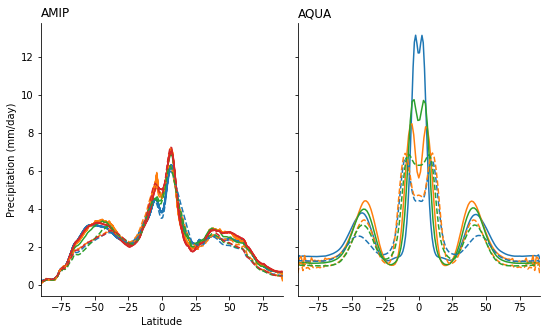

In [50]:
# plot the zonal means:
# quarter page is smallest 95 mm x 115 mm = 
# full page Full page = 190 mm x 230 mm
def mm2inches(x):
    return x * 0.0393701


fig, ax = plt.subplots(figsize=(mm2inches(190), mm2inches(115)), ncols=2, constrained_layout=True, sharey=True)
for ex in ZM:
    for m in K[ex]:
        for b in K[ex][m]:
#             print(f"working on {ex} - {m} - {b}")
            xlat = ZM[ex][m][b]['lat']
            xzm = ZM[ex][m][b]
            c = select_color(m)
            if 'lwoff' in ex:
                ls = 'dashed'
            else:
                ls = 'solid'
            if max(xzm) < 1:
                print(f"WARNING: {ex} - {m} - {b}")
            if 'aqua' in ex:
                a = ax[1]
            else:
                a = ax[0]
            a.plot(xlat, xzm, color=c, linestyle=ls)
ax[0].set_ylabel("Precipitation (mm/day)")
ax[0].set_xlabel("Latitude")
ax[0].set_title("AMIP", loc='left')
ax[1].set_title("AQUA", loc='left')
[a.set_xlim([-90,90]) for a in ax]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]

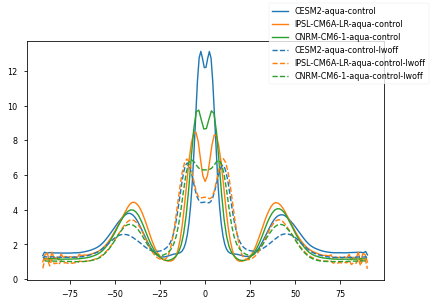

In [6]:
## First, get the time mean of pr and plot them

with plt.style.context('seaborn-paper'):    
    fig, ax = plt.subplots()
    for ex in H:
        if "lwoff" in ex:
            linsty = "dashed"
        else:
            linsty = "solid"
        for m in H[ex]:
            datmp = (H[ex][m]['pr']*86400.).compute()
            ax.plot(datmp['lat'], datmp.mean(dim=('time','lon')), linestyle=linsty, label=f"{m}-{ex}", color=clrs[m])
    fig.legend()

In [92]:
# TOO SLOW -- Can make this more easily than this.
# with plt.style.context('seaborn-paper'):    
#     fig, ax = plt.subplots()
#     for ex in K:
#         if "lwoff" in ex:
#             linsty = "dashed"
#         else:
#             linsty = "solid"
#         for m in K[ex]:
#             print(f"working on {ex} - {m}")
#             # join members
#             da_list = [(K[ex][m][b]['pr']*86400.).compute().mean(dim=('time','lon')) for b in K[ex][m]]
#             datmp = sum(da_list) / len(da_list)
#             ax.plot(datmp['lat'], datmp, linestyle=linsty, label=f"{m}-{ex}", color=clrs[m])
#     fig.legend()

In [ ]:
%%time
# now let's focus on the rainbelts, 20S-20N
# and take a look at the KDE
# kde = dict()
# for ex in H:
#     for m in H[ex]:
#         k = "-".join([m,ex])
#         print(k)
#         datmp = (H[ex][m]['pr'].sel(lat=slice(-20,20))*86400.).compute()
#         kde[k] = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(datmp.values.flatten().reshape(-1, 1))

In [53]:
%%time
# well, kde is super slow, what about just old fashioned histogram
B = np.arange(0, 101, 1)
ahist = dict()
aquan = dict()
quantiles = [0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
for ex in K:
    for m in K[ex]:
        for b in K[ex][m]:
            k = "-".join([m,ex,b])
            print(k)
            datmp = (K[ex][m][b]['pr'].sel(lat=slice(-20,20))*86400.).compute()
            arr = datmp.values.flatten()
            weights = np.cos(np.radians(datmp['lat'])).broadcast_like(datmp) 
            ahist[k] = np.histogram(arr, bins=B, weights=weights.values.flatten(), density=True)
            aquan[k] = np.quantile(arr, quantiles)

CESM2-amip-r1i1p1f1
CESM2-amip-r3i1p1f1
CESM2-amip-r5i1p1f1
CESM2-amip-r6i1p1f1
CESM2-amip-r10i1p1f1
CESM2-amip-r8i1p1f1
CESM2-amip-r4i1p1f1
CESM2-amip-r9i1p1f1
CESM2-amip-r2i1p1f1
CESM2-amip-r7i1p1f1
IPSL-CM6A-LR-amip-r1i1p1f1
IPSL-CM6A-LR-amip-r3i1p1f1
IPSL-CM6A-LR-amip-r5i1p1f1
IPSL-CM6A-LR-amip-r6i1p1f1
IPSL-CM6A-LR-amip-r10i1p1f1
IPSL-CM6A-LR-amip-r8i1p1f1
IPSL-CM6A-LR-amip-r4i1p1f1
IPSL-CM6A-LR-amip-r9i1p1f1
IPSL-CM6A-LR-amip-r11i1p1f1
IPSL-CM6A-LR-amip-r2i1p1f1
IPSL-CM6A-LR-amip-r7i1p1f1
CNRM-CM6-1-amip-r1i1p1f2
MRI-ESM2-0-amip-r1i1p1f1
MRI-ESM2-0-amip-r2i1p1f1
MRI-ESM2-0-amip-r3i1p1f1
CESM2-amip-lwoff-r1i1p1f1
IPSL-CM6A-LR-amip-lwoff-r1i1p1f1
CNRM-CM6-1-amip-lwoff-r1i1p1f2
MRI-ESM2-0-amip-lwoff-r1i1p1f1
CESM2-aqua-control-r1i1p1f1
IPSL-CM6A-LR-aqua-control-r1i1p1f1
CNRM-CM6-1-aqua-control-r1i1p1f2
CESM2-aqua-control-lwoff-r1i1p1f1
IPSL-CM6A-LR-aqua-control-lwoff-r1i1p1f1
CNRM-CM6-1-aqua-control-lwoff-r1i1p1f2
CPU times: user 13min 46s, sys: 2min 15s, total: 16min 1s
Wall time: 

In [54]:
aquan

{'CESM2-amip-r1i1p1f1': array([ 1.29379094,  4.64119828, 10.67339802, 16.91421127, 35.51686516,
        65.00972488]),
 'CESM2-amip-r3i1p1f1': array([ 1.28605473,  4.63834715, 10.68369675, 16.9515481 , 35.69089527,
        65.57940376]),
 'CESM2-amip-r5i1p1f1': array([ 1.29007936,  4.63948977, 10.68024826, 16.93764114, 35.61595192,
        65.39424133]),
 'CESM2-amip-r6i1p1f1': array([ 1.29276884,  4.64790392, 10.69873238, 16.96941948, 35.68247604,
        65.31494347]),
 'CESM2-amip-r10i1p1f1': array([ 1.29074764,  4.64044201, 10.69307327, 16.96402168, 35.70678368,
        65.24638741]),
 'CESM2-amip-r8i1p1f1': array([ 1.28995389,  4.64428806, 10.68810558, 16.94162941, 35.55892639,
        65.05521561]),
 'CESM2-amip-r4i1p1f1': array([ 1.28641093,  4.63465738, 10.67182541, 16.94267702, 35.66520691,
        65.37205208]),
 'CESM2-amip-r9i1p1f1': array([ 1.2882427 ,  4.63939857, 10.66386604, 16.91576385, 35.59289665,
        65.10003662]),
 'CESM2-amip-r2i1p1f1': array([ 1.29074585,  4.

In [29]:
# %%time
# # well, kde is super slow, what about just old fashioned histogram
# B = np.arange(0, 101, 1)
# hist = dict()
# quan = dict()
# quantiles = [0.5, 0.9, 0.95, 0.99, 0.999]
# for ex in H:
#     for m in H[ex]:
#         k = "-".join([m,ex])
#         print(k)
#         datmp = (K[ex][m]['pr'].sel(lat=slice(-20,20))*86400.).compute()
#         arr = datmp.values.flatten()
#         weights = np.cos(np.radians(datmp['lat'])).broadcast_like(datmp) 
#         hist[k] = np.histogram(arr, bins=B, weights=weights.values.flatten(), density=True)
#         quan[k] = np.quantile(arr, quantiles)

NameError: name 'H' is not defined

k = CESM2-amip-r7i1p1f1
k = CESM2-amip-r9i1p1f1
k = CESM2-amip-r4i1p1f1
k = CESM2-amip-r8i1p1f1
k = CESM2-amip-r1i1p1f1
k = CESM2-amip-r10i1p1f1
k = CESM2-amip-r3i1p1f1
k = CESM2-amip-r2i1p1f1
k = CESM2-amip-r6i1p1f1
k = CESM2-amip-r5i1p1f1
k = IPSL-CM6A-LR-amip-r7i1p1f1
k = IPSL-CM6A-LR-amip-r9i1p1f1
k = IPSL-CM6A-LR-amip-r11i1p1f1
k = IPSL-CM6A-LR-amip-r4i1p1f1
k = IPSL-CM6A-LR-amip-r8i1p1f1
k = IPSL-CM6A-LR-amip-r1i1p1f1
k = IPSL-CM6A-LR-amip-r10i1p1f1
k = IPSL-CM6A-LR-amip-r3i1p1f1
k = IPSL-CM6A-LR-amip-r2i1p1f1
k = IPSL-CM6A-LR-amip-r6i1p1f1
k = IPSL-CM6A-LR-amip-r5i1p1f1
k = CNRM-CM6-1-amip-r1i1p1f2
k = CESM2-amip-lwoff-r1i1p1f1
k = IPSL-CM6A-LR-amip-lwoff-r1i1p1f1
k = CNRM-CM6-1-amip-lwoff-r1i1p1f2


[Text(0, 0, 'CESM1'), Text(0, 0, 'IPSL'), Text(0, 0, 'CNRM')]

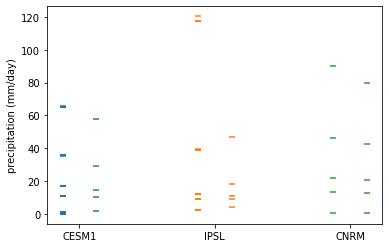

In [105]:
mx = {"CESM": 1, "IPSL": 2, "CNRM": 3}
mc = {"CESM": "C0", "IPSL": "C1", "CNRM": "C2"}
fig, ax = plt.subplots()
for k in aquan:
    print(f"k = {k}")
    xval = mx[k[0:4]]
    cval = mc[k[0:4]]
    if 'lwoff' in k:
        xval += 0.25
    ax.scatter(xval*np.ones(len(aquan[k])), aquan[k], color=cval, marker='_')
ax.set_ylabel("precipitation (mm/day)")
ax.set_xticks([1.125, 2.125, 3.125])
ax.set_xticklabels(["CESM1", "IPSL", "CNRM"])

/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


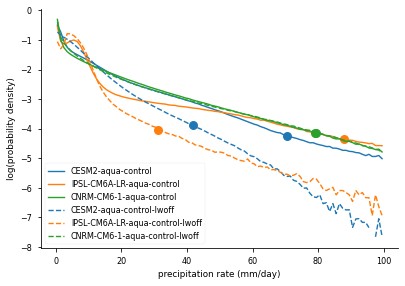

In [60]:
bctr = hist['CESM2-aqua-control'][1][0:-1] + 0.5*np.diff(hist['CESM2-aqua-control'][1])
with plt.style.context('seaborn-paper'):    
    fig, ax = plt.subplots()
    for i in hist:
        if 'lwoff' in i:
            linsty = 'dashed'
        else:
            linsty = 'solid'
        ax.plot(bctr, np.log10(hist[i][0]), color=clrs2[i], linestyle=linsty, label=i)
        nearest_idx = np.abs(bctr - quan[i][-1]).argmin()
        ax.plot(quan[i][-1], np.log10(hist[i][0][nearest_idx]), marker='o', color=clrs2[i], markersize=9)
    ax.legend(loc='lower left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel("log(probability density)")
    ax.set_xlabel("precipitation rate (mm/day)")
    fig.savefig("/Users/brianpm/Desktop/cmip6_aqua_pr_histgram.png", dpi=300, bbox_inches='tight')

/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


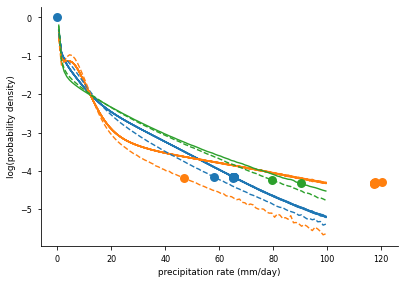

In [111]:
bctr = ahist['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist['CESM2-amip-r7i1p1f1'][1])
with plt.style.context('seaborn-paper'):    
    fig, ax = plt.subplots()
    for i in ahist:
        if 'lwoff' in i:
            linsty = 'dashed'
        else:
            linsty = 'solid'
        cval = mc[i[0:4]]
        ax.plot(bctr, np.log10(ahist[i][0]), color=cval, linestyle=linsty, label=i)
        nearest_idx = np.abs(bctr - aquan[i][-1]).argmin()
        ax.plot(aquan[i][-1], np.log10(ahist[i][0][nearest_idx]), marker='o', color=cval, markersize=9)
#     ax.legend(loc='lower left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel("log(probability density)")
    ax.set_xlabel("precipitation rate (mm/day)")
    fig.savefig("/Users/brianpm/Desktop/cmip6_amip_pr_histgram.png", dpi=300, bbox_inches='tight')

CESM2-amip
CESM2-amip-lwoff
CESM2-aqua-control
CESM2-aqua-control-lwoff
IPSL-CM6A-LR-amip
IPSL-CM6A-LR-amip-lwoff
IPSL-CM6A-LR-aqua-control
IPSL-CM6A-LR-aqua-control-lwoff
CNRM-CM6-1-amip
CNRM-CM6-1-amip-lwoff
CNRM-CM6-1-aqua-control
CNRM-CM6-1-aqua-control-lwoff
MRI-ESM2-0-amip
MRI-ESM2-0-amip-lwoff


/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'precipitation rate (mm/day)')

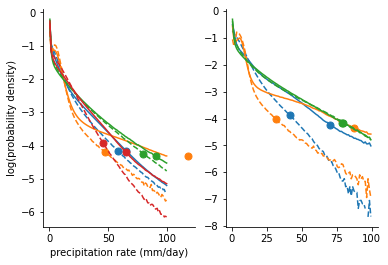

In [85]:
#
# histograms that combine the amip ensemble members
#
m_combine = dict()
m_n = dict()
m_q = dict()
for m in models:
    for ex in experiments:
        s = "-".join([m,ex])
        m_n[s] = 0
        for ah in ahist:
            if (s in ah) and (ah[len(s)+1] == 'r'):
                if s in m_combine:
                    m_combine[s].append(ahist[ah][0])
                    m_q[s].append(aquan[ah][-1])
                else:
                    m_combine[s] = [ahist[ah][0]]
                    m_q[s] = [aquan[ah][-1]]
                m_n[s] += 1 
m_toplot = dict()
for m in m_combine:
    if len(m_combine[m]) > 1:
        m_toplot[m] = sum(m_combine[m])/m_n[m]
        m_q[m] = sum(m_q[m])/m_n[m]
    else:
        m_toplot[m] = m_combine[m][0]
        m_q[m] = m_q[m][0]

bctr = ahist['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist['CESM2-amip-r7i1p1f1'][1]) # bin centers are the same for all histograms
fig, ax = plt.subplots(ncols=2)
for i in m_toplot:
    print(i)
    if 'lwoff' in i:
        linsty = 'dashed'
    else:
        linsty = 'solid'
    if 'aqua' in i:
        a = ax[1]
    else:
        a = ax[0]
    cval = select_color(i)
    a.plot(bctr, np.log10(m_toplot[i]), color=cval, linestyle=linsty, label=i)
    nearest_idx = np.abs(bctr - m_q[i]).argmin()
    a.plot(m_q[i], np.log10(m_toplot[i][nearest_idx]), marker='o', color=cval, markersize=7)
#     ax.legend(loc='lower left')
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
ax[0].set_ylabel("log(probability density)")
ax[0].set_xlabel("precipitation rate (mm/day)")


CESM2-amip
CESM2-amip-lwoff
CESM2-aqua-control
CESM2-aqua-control-lwoff
IPSL-CM6A-LR-amip
IPSL-CM6A-LR-amip-lwoff
IPSL-CM6A-LR-aqua-control
IPSL-CM6A-LR-aqua-control-lwoff
CNRM-CM6-1-amip
CNRM-CM6-1-amip-lwoff
CNRM-CM6-1-aqua-control
CNRM-CM6-1-aqua-control-lwoff
MRI-ESM2-0-amip
MRI-ESM2-0-amip-lwoff


/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


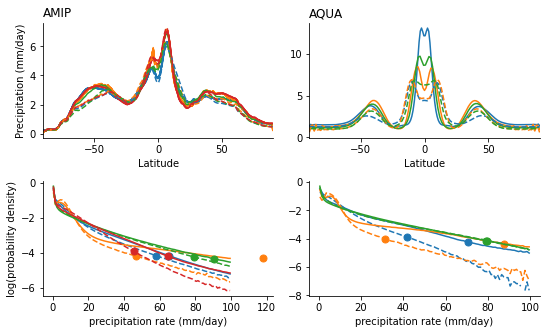

In [88]:
#
# Now can I get the zonal mean and distribution on to one plot
#

fig, axx = plt.subplots(figsize=(mm2inches(190), mm2inches(115)), ncols=2, nrows=2, constrained_layout=True)
ax = axx[0,:]
for ex in ZM:
    for m in K[ex]:
        for b in K[ex][m]:
#             print(f"working on {ex} - {m} - {b}")
            xlat = ZM[ex][m][b]['lat']
            xzm = ZM[ex][m][b]
            c = select_color(m)
            if 'lwoff' in ex:
                ls = 'dashed'
            else:
                ls = 'solid'
            if max(xzm) < 1:
                print(f"WARNING: {ex} - {m} - {b}")
            if 'aqua' in ex:
                a = ax[1]
            else:
                a = ax[0]
            a.plot(xlat, xzm, color=c, linestyle=ls)
ax[0].set_ylabel("Precipitation (mm/day)")
[a.set_xlabel("Latitude") for a in ax]
ax[0].set_title("AMIP", loc='left')
ax[1].set_title("AQUA", loc='left')
[a.set_xlim([-90,90]) for a in ax]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]

bctr = ahist['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist['CESM2-amip-r7i1p1f1'][1]) # bin centers are the same for all histograms
ax = axx[1,:]
for i in m_toplot:
    print(i)
    if 'lwoff' in i:
        linsty = 'dashed'
    else:
        linsty = 'solid'
    if 'aqua' in i:
        a = ax[1]
    else:
        a = ax[0]
    cval = select_color(i)
    a.plot(bctr, np.log10(m_toplot[i]), color=cval, linestyle=linsty, label=i)
    nearest_idx = np.abs(bctr - m_q[i]).argmin()
    a.plot(m_q[i], np.log10(m_toplot[i][nearest_idx]), marker='o', color=cval, markersize=7)
#     ax.legend(loc='lower left')
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
ax[0].set_ylabel("log(probability density)")
[a.set_xlabel("precipitation rate (mm/day)") for a in ax]

fig.savefig("/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/amip_aqua_zonal_and_pdf.pdf")

Text(0.5, 0.98, 'CESM2 Equatorial Precipitation (mm/day)')

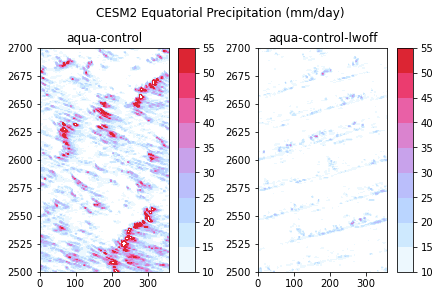

In [79]:
# hovmoller near equator
datmp = (H['aqua-control']['CESM2']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()
datmp2 = (H['aqua-control-lwoff']['CESM2']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()

fig, ax = plt.subplots(ncols=2, constrained_layout=True)


vmn = 10.0
vmx = 60.0
stp = 5
n = mpl.colors.Normalize(vmin=vmn, vmax=vmx-stp)
levels = np.arange(vmn, vmx, stp)

mlon, mtime = np.meshgrid(datmp['lon'], np.arange(1, 1+len(datmp['time'])))
img = ax[0].contourf(mlon, mtime, datmp, levels=levels, norm=n, cmap=cc.cm.CET_L19)

mlon2, mtime2 = np.meshgrid(datmp2['lon'], np.arange(1, 1+len(datmp2['time'])))
img2 = ax[1].contourf(mlon2, mtime2, datmp2, levels=levels, norm=n, cmap=cc.cm.CET_L19)


cb1 = fig.colorbar(img, ax=ax[0])
cb2 = fig.colorbar(img2, ax=ax[1])

ax[0].set_ylim([2500, 2700])
ax[1].set_ylim([2500, 2700])
ax[0].set_title("aqua-control")
ax[1].set_title("aqua-control-lwoff")
fig.suptitle("CESM2 Equatorial Precipitation (mm/day)")
# fig.savefig("/Users/brianpm/Desktop/cmip6_cesm_aqua_pr_hov.png", dpi=300, bbox_inches='tight')

Text(0.5, 0.98, 'CNRM-CM6 Equatorial Precipitation (mm/day)')

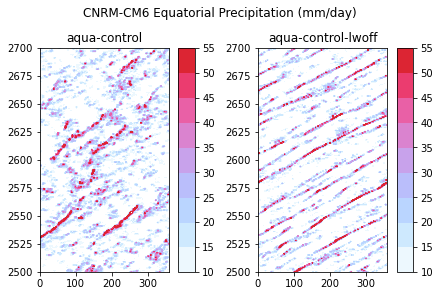

In [80]:
datmp = (H['aqua-control']['CNRM-CM6-1']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()
datmp2 = (H['aqua-control-lwoff']['CNRM-CM6-1']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()
fig, ax = plt.subplots(ncols=2, constrained_layout=True)


vmn = 10.0
vmx = 60.0
stp = 5
n = mpl.colors.Normalize(vmin=vmn, vmax=vmx-stp)
levels = np.arange(vmn, vmx, stp)

mlon, mtime = np.meshgrid(datmp['lon'], np.arange(1, 1+len(datmp['time'])))
img = ax[0].contourf(mlon, mtime, datmp, levels=levels, norm=n, cmap=cc.cm.CET_L19)

mlon2, mtime2 = np.meshgrid(datmp2['lon'], np.arange(1, 1+len(datmp2['time'])))
img2 = ax[1].contourf(mlon2, mtime2, datmp2, levels=levels, norm=n, cmap=cc.cm.CET_L19)


cb1 = fig.colorbar(img, ax=ax[0])
cb2 = fig.colorbar(img2, ax=ax[1])

ax[0].set_ylim([2500, 2700])
ax[1].set_ylim([2500, 2700])
ax[0].set_title("aqua-control")
ax[1].set_title("aqua-control-lwoff")
fig.suptitle("CNRM-CM6 Equatorial Precipitation (mm/day)")
# fig.savefig("/Users/brianpm/Desktop/cmip6_CNRM-CM6_aqua_pr_hov.png", dpi=300, bbox_inches='tight')

Text(0.5, 0.98, 'IPSL-CM6A Equatorial Precipitation (mm/day)')

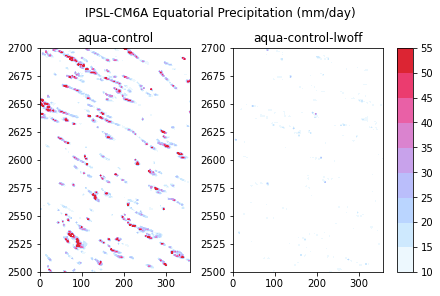

In [82]:
datmp = (H['aqua-control']['IPSL-CM6A-LR']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()
datmp2 = (H['aqua-control-lwoff']['IPSL-CM6A-LR']['pr'].sel(lat=slice(-2.5,2.5))*86400.).mean(dim='lat').compute()
fig, ax = plt.subplots(ncols=2, constrained_layout=True)


vmn = 10.0
vmx = 60.0
stp = 5
n = mpl.colors.Normalize(vmin=vmn, vmax=vmx-stp)
levels = np.arange(vmn, vmx, stp)

mlon, mtime = np.meshgrid(datmp['lon'], np.arange(1, 1+len(datmp['time'])))
img = ax[0].contourf(mlon, mtime, datmp, levels=levels, norm=n, cmap=cc.cm.CET_L19)

mlon2, mtime2 = np.meshgrid(datmp2['lon'], np.arange(1, 1+len(datmp2['time'])))
img2 = ax[1].contourf(mlon2, mtime2, datmp2, levels=levels, norm=n, cmap=cc.cm.CET_L19)


# cb1 = fig.colorbar(img, ax=ax[0])
# cb2 = fig.colorbar(img2, ax=ax[1])
cb = fig.colorbar(img2, ax=ax)
ax[0].set_ylim([2500, 2700])
ax[1].set_ylim([2500, 2700])
ax[0].set_title("aqua-control")
ax[1].set_title("aqua-control-lwoff")
fig.suptitle("IPSL-CM6A Equatorial Precipitation (mm/day)")
# fig.savefig("/Users/brianpm/Desktop/cmip6_IPSL-CM6A_aqua_pr_hov.png", dpi=300, bbox_inches='tight')

(-90.0, 90.0)

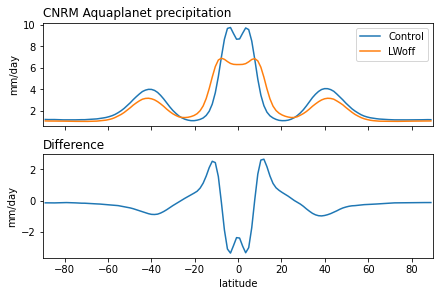

In [16]:
fig, ax = plt.subplots(nrows=2, constrained_layout=True, sharex=True)

ax[0].plot(ds1['lat'], 86400*ds1['pr'].mean(dim=('time','lon')), label='Control')
ax[0].plot(ds2['lat'], 86400*ds2['pr'].mean(dim=('time','lon')), label='LWoff')
ax[0].set_title("CNRM Aquaplanet precipitation", loc='left')
ax[0].legend()
ax[0].set_ylabel("mm/day")
ax[1].plot(z.lat, 86400*z)
ax[1].set_title("Difference", loc='left')
ax[1].set_ylabel("mm/day")
ax[1].set_xlabel("latitude")
ax[1].set_xlim([-90,90])

In [23]:
# now look at wap (OMEGA)
ds1wap = xr.open_dataset("/Volumes/Glyph6TB/CMIP6/wap_Amon_CNRM-CM6-1_aqua-control_r1i1p1f2_gr_197901-198812.nc")
ds2wap = xr.open_dataset("/Volumes/Glyph6TB/CMIP6/wap_Amon_CNRM-CM6-1_aqua-control-lwoff_r1i1p1f2_gr_197901-198812.nc")

In [25]:
ds1wap

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, plev: 19, time: 120)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * plev         (plev) float32 100000.0 92500.0 85000.0 ... 1000.0 500.0 100.0
  * time         (time) datetime64[ns] 1979-01-16T12:00:00 ... 1988-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    wap          (time, plev, lat, lon) float32 -0.0019248935 ... -5.1684023e-05
Attributes:
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T17:17:22Z
    description:           Extended version of CMIP5/CFMIP-2 aquaControl expe...
    title:                 CNRM-CM6-1 model output prepared for CMIP6 / CFMIP...
    activity_id:           CFMIP
    contact:               contact.cmip@meteo.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.13
    experiment_id:         aqua-control
    experiment:            aquaplanet control
    external_variables:    areacella
    forcing_index:         2
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS....
    grid:                  data regridded to a T127 gaussian grid (128x256 la...
    grid_label:            gr
    nominal_resolution:    250 km
    comment:               a 20-year spin-up starting from a uniform state at...
    initialization_index:  1
    institution_id:        CNRM-CERFACS
    institution:           CNRM (Centre National de Recherches Meteorologique...
    license:               CMIP6 model data produced by CNRM-CERFACS is licen...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 atmos
    references:            http://www.umr-cnrm.fr/cmip6/references
    source:                CNRM-CM6-1 (2017):  aerosol: prescribed monthly fi...
    source_id:             CNRM-CM6-1
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              Amon
    variable_id:           wap
    variant_label:         r1i1p1f2
    EXPID:                 CNRM-CM6-1_aqua-control_r1i1p1f2
    CMIP6_CV_version:      cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:         92ddb3d0d8ce79f498d792fc8e559dcf
    xios_commit:           1442-shuffle
    nemo_gelato_commit:    49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:  6.3.2
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    parent_variant_label:  no parent
    history:               none
    tracking_id:           hdl:21.14100/38c16b97-7447-4595-bafe-e10b55114cde

In [24]:
wap1z = 864. * ds1wap['wap'].mean(dim=('time','lon'))

In [22]:
wap2z = 864. * ds2wap['wap'].mean(dim=('time','lon'))

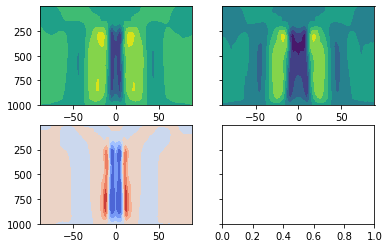

In [32]:
import numpy as np
lat, pres = np.meshgrid(wap1z['lat'], wap1z['plev']/100)
fig2, ax2 = plt.subplots(nrows=2, ncols=2, sharey=True)
ax2[0,0].contourf(lat, pres, wap1z)
ax2[0,1].contourf(lat, pres, wap2z)
ax2[1,0].contourf(lat, pres, wap2z-wap1z, cmap='coolwarm_r')
ax2[0,0].invert_yaxis()

In [36]:
## repeat for IPSL

ds_ipsl_wap_c = xr.open_mfdataset("/Volumes/Glyph6TB/CMIP6/wap_Amon_IPSL-CM6A-LR_aqua-control_r1i1p1f1_gr_*", combine='by_coords')
ds_ipsl_wap_l = xr.open_dataset("/Volumes/Glyph6TB/CMIP6/wap_Amon_IPSL-CM6A-LR_aqua-control-lwoff_r1i1p1f1_gr_197901-198912.nc")

ds_ipsl_pr_c = xr.open_mfdataset("/Volumes/Glyph6TB/CMIP6/pr_Amon_IPSL-CM6A-LR_aqua-control_r1i1p1f1_gr*", combine='by_coords')
ds_ipsl_pr_l = xr.open_dataset("/Volumes/Glyph6TB/CMIP6/pr_Amon_IPSL-CM6A-LR_aqua-control-lwoff_r1i1p1f1_gr_197901-198912.nc")

ipsl_wap_c = 864*ds_ipsl_wap_c['wap'].mean(dim=('time','lon'))
ipsl_wap_l = 864*ds_ipsl_wap_l['wap'].mean(dim=('time','lon'))

ipsl_pr_c = 86400*ds_ipsl_pr_c['pr'].mean(dim=('time','lon'))
ipsl_pr_l = 86400*ds_ipsl_pr_l['pr'].mean(dim=('time','lon'))



Text(0.5, 0.98, 'OMEGA (hPa/day)')

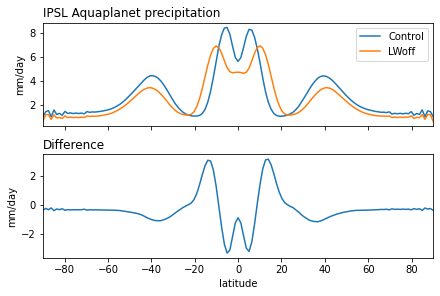

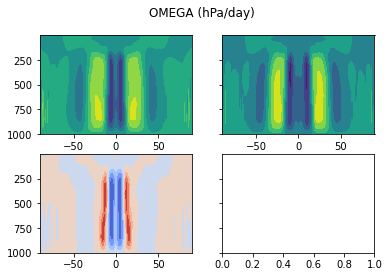

In [38]:
fig, ax = plt.subplots(nrows=2, constrained_layout=True, sharex=True)

ax[0].plot(ipsl_pr_c['lat'], ipsl_pr_c, label='Control')
ax[0].plot(ipsl_pr_l['lat'], ipsl_pr_l, label='LWoff')
ax[0].set_title("IPSL Aquaplanet precipitation", loc='left')
ax[0].legend()
ax[0].set_ylabel("mm/day")
ax[1].plot(ipsl_pr_c.lat, ipsl_pr_l - ipsl_pr_c)
ax[1].set_title("Difference", loc='left')
ax[1].set_ylabel("mm/day")
ax[1].set_xlabel("latitude")
ax[1].set_xlim([-90,90])

lat, pres = np.meshgrid(ipsl_wap_c['lat'], ipsl_wap_c['plev']/100)
fig2, ax2 = plt.subplots(nrows=2, ncols=2, sharey=True)
ax2[0,0].contourf(lat, pres, ipsl_wap_c)
ax2[0,1].contourf(lat, pres, ipsl_wap_l)
ax2[1,0].contourf(lat, pres, ipsl_wap_l-ipsl_wap_c, cmap='coolwarm_r')
ax2[0,0].invert_yaxis()
fig2.suptitle("OMEGA (hPa/day)")

In [ ]:
#
# Zonal mean response is pretty similar --- look at precipitation distribution
#

cnrm_pr_day_ds = xr.open_dataset("/Volumes/Glyph6TB/CMIP6/pr_day_CNRM-CM6-1_aqua-control_r1i1p1f2_gr_19790101-19881231.nc")
cnrm_pr_day = cnrm_pr_day_ds['pr'].sel(lat=slice(-30,30))


In [15]:
checkfils = ['pr_day_CESM2_amip_r1i1p1f1_gn_19500101-19591231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_19600101-19691231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_19700101-19791231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_19800101-19891231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_19900101-19991231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_20000101-20091231.nc',
'pr_day_CESM2_amip_r1i1p1f1_gn_20100101-20150101.nc']
for cf in checkfils:
    d0 = xr.open_dataset(f"/Volumes/Glyph6TB/CMIP6/{cf}")
    print(d0['pr'].max().item())
    print(d0['pr'].min().item())

/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


5.59286092993716e-08
0.0
6.408838970628494e-08
0.0
5.277151515770129e-08
0.0
5.912330891533202e-08
0.0
6.06271512992862e-08
0.0
6.165975463545692e-08
0.0
5.855545381905358e-08
0.0


In [39]:
K['amip']['CESM2']['r1i1p1f1']

<xarray.DataArray 'pr' (lat: 192)>
array([0.18891923, 0.19271329, 0.20474608, 0.23002607, 0.25951794,
       0.26536247, 0.24715553, 0.23719686, 0.24032034, 0.2501488 ,
       0.27648154, 0.30864388, 0.35853013, 0.44124156, 0.58506197,
       0.7249854 , 0.78559667, 0.8406295 , 0.8830549 , 0.90821487,
       0.9940262 , 1.1296446 , 1.2967832 , 1.4599524 , 1.6384772 ,
       1.8239747 , 1.973309  , 2.058771  , 2.116375  , 2.187573  ,
       2.287707  , 2.3952167 , 2.500273  , 2.6026947 , 2.6990933 ,
       2.78239   , 2.8438547 , 2.885619  , 2.9033992 , 2.9034474 ,
       2.8995938 , 2.8952715 , 2.89003   , 2.8837337 , 2.8845105 ,
       2.8658662 , 2.8428214 , 2.8295763 , 2.819911  , 2.8083048 ,
       2.7854476 , 2.7656593 , 2.738131  , 2.694825  , 2.6500082 ,
       2.5960593 , 2.5306652 , 2.4630797 , 2.4027703 , 2.3463805 ,
       2.2982025 , 2.2609644 , 2.2291214 , 2.1951241 , 2.1627727 ,
       2.1268806 , 2.0903819 , 2.0560017 , 2.0298119 , 2.0093007 ,
       2.0041113 , 2.0242028 , 2.0563319 , 2.0929396 , 2.1533208 ,
       2.2242296 , 2.3118188 , 2.4164886 , 2.53525   , 2.662864  ,
       2.7751179 , 2.8988445 , 2.9849474 , 3.0434906 , 3.1414757 ,
       3.2643893 , 3.432414  , 3.6525803 , 3.8828723 , 4.0634804 ,
       4.1865964 , 4.198184  , 4.09302   , 3.8907843 , 3.6809251 ,
       3.5742705 , 3.5898488 , 3.794216  , 4.147405  , 4.612255  ,
       5.1018224 , 5.5257564 , 5.787471  , 5.822771  , 5.5995736 ,
       5.238774  , 4.852706  , 4.4705725 , 4.0789003 , 3.7046928 ,
       3.3848014 , 3.1089602 , 2.8775165 , 2.6901443 , 2.5404212 ,
       2.406142  , 2.3082297 , 2.204197  , 2.1107671 , 2.0463545 ,
       2.013963  , 1.9934846 , 1.97902   , 1.9939603 , 2.1279817 ,
       2.217591  , 2.1690588 , 2.075863  , 2.0556223 , 2.091141  ,
       2.1501496 , 2.2132137 , 2.279117  , 2.3382292 , 2.3743477 ,
       2.3887722 , 2.3911977 , 2.3771634 , 2.3588097 , 2.3417091 ,
       2.298028  , 2.2655663 , 2.2337158 , 2.2022424 , 2.1928086 ,
       2.1951249 , 2.1999843 , 2.2025325 , 2.2150931 , 2.2221642 ,
       2.215972  , 2.2100897 , 2.1891718 , 2.1586287 , 2.1417298 ,
       2.136851  , 2.1219885 , 2.1016552 , 2.1157265 , 2.1487632 ,
       2.0522087 , 1.8992461 , 1.7975292 , 1.7491956 , 1.6918284 ,
       1.6105186 , 1.5337862 , 1.4528075 , 1.3564537 , 1.2753806 ,
       1.1992465 , 1.1273851 , 1.0591217 , 0.9972394 , 0.9535025 ,
       0.92509407, 0.89592206, 0.86027855, 0.81170934, 0.7691284 ,
       0.731584  , 0.709964  , 0.6950741 , 0.6869871 , 0.6839129 ,
       0.6752545 , 0.64803755, 0.6333795 , 0.6207541 , 0.6073528 ,
       0.5986861 , 0.5482787 ], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [112]:
# Zonal Mean without LAND

# zonal average for each simulation
ZMnl = dict()
for ex in K:
    ZMnl[ex] = dict()
    for m in K[ex]:
        ZMnl[ex][m] = dict()
        for b in K[ex][m]:
            print(f"working on {ex} - {m} - {b}")
            tmp = (K[ex][m][b]['pr'].compute()*86400.)
            if (ex in LAND) and (m in LAND[ex]) and (b in LAND[ex][m]):
                landfrac = LAND[ex][m][b]['sftlf']
                tmp = tmp.where(landfrac <= 0)
            ZMnl[ex][m][b] = tmp.mean(dim=('time','lon'))
            

working on amip - CESM2 - r1i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r3i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r5i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r6i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r10i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r8i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r4i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r9i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r2i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - CESM2 - r7i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - IPSL-CM6A-LR - r1i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip - IPSL-CM6A-LR - r3i1p1f1
working on amip - IPSL-CM6A-LR - r5i1p1f1
working on amip - IPSL-CM6A-LR - r6i1p1f1
working on amip - IPSL-CM6A-LR - r10i1p1f1
working on amip - IPSL-CM6A-LR - r8i1p1f1
working on amip - IPSL-CM6A-LR - r4i1p1f1
working on amip - IPSL-CM6A-LR - r9i1p1f1
working on amip - IPSL-CM6A-LR - r11i1p1f1
working on amip - IPSL-CM6A-LR - r2i1p1f1
working on amip - IPSL-CM6A-LR - r7i1p1f1
working on amip - CNRM-CM6-1 - r1i1p1f2
working on amip - MRI-ESM2-0 - r1i1p1f1
working on amip - MRI-ESM2-0 - r2i1p1f1
working on amip - MRI-ESM2-0 - r3i1p1f1
working on amip-lwoff - CESM2 - r1i1p1f1


/Users/brianpm/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


working on amip-lwoff - IPSL-CM6A-LR - r1i1p1f1
working on amip-lwoff - CNRM-CM6-1 - r1i1p1f2
working on amip-lwoff - MRI-ESM2-0 - r1i1p1f1
working on aqua-control - CESM2 - r1i1p1f1
working on aqua-control - IPSL-CM6A-LR - r1i1p1f1
working on aqua-control - CNRM-CM6-1 - r1i1p1f2
working on aqua-control-lwoff - CESM2 - r1i1p1f1
working on aqua-control-lwoff - IPSL-CM6A-LR - r1i1p1f1
working on aqua-control-lwoff - CNRM-CM6-1 - r1i1p1f2


[None, None]

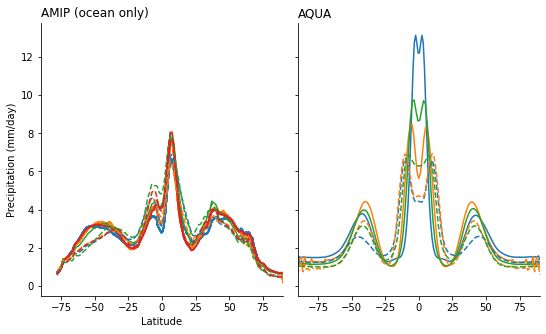

In [114]:
fig, ax = plt.subplots(figsize=(mm2inches(190), mm2inches(115)), ncols=2, constrained_layout=True, sharey=True)
for ex in ZMnl:
    for m in K[ex]:
        for b in K[ex][m]:
#             print(f"working on {ex} - {m} - {b}")
            xlat = ZMnl[ex][m][b]['lat']
            xzm = ZMnl[ex][m][b]
            c = select_color(m)
            if 'lwoff' in ex:
                ls = 'dashed'
            else:
                ls = 'solid'
            if max(xzm) < 1:
                print(f"WARNING: {ex} - {m} - {b}")
            if 'aqua' in ex:
                a = ax[1]
            else:
                a = ax[0]
            a.plot(xlat, xzm, color=c, linestyle=ls)
ax[0].set_ylabel("Precipitation (mm/day)")
ax[0].set_xlabel("Latitude")
ax[0].set_title("AMIP (ocean only)", loc='left')
ax[1].set_title("AQUA", loc='left')
[a.set_xlim([-90,90]) for a in ax]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]

In [120]:
%%time
# well, kde is super slow, what about just old fashioned histogram
B = np.arange(0, 101, 1)
ahist_nl = dict()
aquan_nl = dict()
quantiles = [0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
for ex in K:
    for m in K[ex]:
        for b in K[ex][m]:
            k = "-".join([m,ex,b])
            print(k)
            if (ex in LAND) and (m in LAND[ex]) and (b in LAND[ex][m]):
                datmp = (K[ex][m][b]['pr'].sel(lat=slice(-20,20))*86400.).compute()
                landfrac = LAND[ex][m][b]['sftlf'].sel(lat=slice(-20,20))
                datmp = datmp.where(landfrac <= 0)            
                arr = datmp.values.flatten()
                weights = np.cos(np.radians(datmp['lat'])).broadcast_like(datmp) 
                ahist_nl[k] = np.histogram(arr, bins=B, weights=weights.values.flatten(), density=True)
                aquan_nl[k] = np.nanquantile(arr, quantiles)
            else:
                ahist_nl[k] = ahist[k]
                aquan_nl[k] = aquan[k]

CESM2-amip-r1i1p1f1
CESM2-amip-r3i1p1f1
CESM2-amip-r5i1p1f1
CESM2-amip-r6i1p1f1
CESM2-amip-r10i1p1f1
CESM2-amip-r8i1p1f1
CESM2-amip-r4i1p1f1
CESM2-amip-r9i1p1f1
CESM2-amip-r2i1p1f1
CESM2-amip-r7i1p1f1
IPSL-CM6A-LR-amip-r1i1p1f1
IPSL-CM6A-LR-amip-r3i1p1f1
IPSL-CM6A-LR-amip-r5i1p1f1
IPSL-CM6A-LR-amip-r6i1p1f1
IPSL-CM6A-LR-amip-r10i1p1f1
IPSL-CM6A-LR-amip-r8i1p1f1
IPSL-CM6A-LR-amip-r4i1p1f1
IPSL-CM6A-LR-amip-r9i1p1f1
IPSL-CM6A-LR-amip-r11i1p1f1
IPSL-CM6A-LR-amip-r2i1p1f1
IPSL-CM6A-LR-amip-r7i1p1f1
CNRM-CM6-1-amip-r1i1p1f2
MRI-ESM2-0-amip-r1i1p1f1
MRI-ESM2-0-amip-r2i1p1f1
MRI-ESM2-0-amip-r3i1p1f1
CESM2-amip-lwoff-r1i1p1f1
IPSL-CM6A-LR-amip-lwoff-r1i1p1f1
CNRM-CM6-1-amip-lwoff-r1i1p1f2
MRI-ESM2-0-amip-lwoff-r1i1p1f1
CESM2-aqua-control-r1i1p1f1
IPSL-CM6A-LR-aqua-control-r1i1p1f1
CNRM-CM6-1-aqua-control-r1i1p1f2
CESM2-aqua-control-lwoff-r1i1p1f1
IPSL-CM6A-LR-aqua-control-lwoff-r1i1p1f1
CNRM-CM6-1-aqua-control-lwoff-r1i1p1f2
CPU times: user 9min 37s, sys: 1min 58s, total: 11min 35s
Wall time: 

In [161]:
%%time
#
# histograms that combine the amip ensemble members
#
m_combine_nl = dict()
m_n_nl = dict()
m_q_nl = dict()
for m in models:
    for ex in experiments:
        s = "-".join([m,ex])
        m_n_nl[s] = 0
        for ah in ahist_nl:
            if (s in ah) and (ah[len(s)+1] == 'r'):
                if s in m_combine_nl:
                    m_combine_nl[s].append(ahist_nl[ah][0])
                    m_q_nl[s].append(aquan_nl[ah][-1])
                else:
                    m_combine_nl[s] = [ahist_nl[ah][0]]
                    m_q_nl[s] = [aquan_nl[ah][-1]]
                m_n_nl[s] += 1 
m_toplot_nl = dict()
for m in m_combine_nl:
    if len(m_combine_nl[m]) > 1:
        m_toplot_nl[m] = sum(m_combine_nl[m])/m_n_nl[m]
        m_q_nl[m] = sum(m_q_nl[m])/m_n_nl[m]
    else:
        m_toplot_nl[m] = m_combine_nl[m][0]
        m_q_nl[m] = m_q_nl[m][0]



CPU times: user 225 µs, sys: 7 µs, total: 232 µs
Wall time: 237 µs


Index: 63, X-Value: 63.76187115364068, Y-Value: 2.5422138609296548e-05
Index: 60, X-Value: 60.34962719726536, Y-Value: 6.839302121610936e-05
Index: 70, X-Value: 70.50351337432863, Y-Value: 5.877780473461169e-05
Index: 41, X-Value: 41.828793449402326, Y-Value: 0.0001311118680597205
Index: 99, X-Value: 108.09620172535283, Y-Value: 1.4122340326897527e-05
Index: 48, X-Value: 48.478301071166925, Y-Value: 6.477816396332388e-05
Index: 87, X-Value: 87.81021453857443, Y-Value: 4.37577947179839e-05
Index: 31, X-Value: 31.32345362472536, Y-Value: 9.35823292560978e-05
Index: 94, X-Value: 94.21379080963106, Y-Value: 4.683370912838017e-05
Index: 84, X-Value: 84.1965376205435, Y-Value: 5.699354556399809e-05
Index: 79, X-Value: 79.4539430694573, Y-Value: 7.054444613702733e-05
Index: 79, X-Value: 79.15798419952313, Y-Value: 7.020272334166798e-05
Index: 64, X-Value: 64.9563751525875, Y-Value: 2.190599484082386e-05
Index: 47, X-Value: 47.5054039688107, Y-Value: 0.00011232297847041706


/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


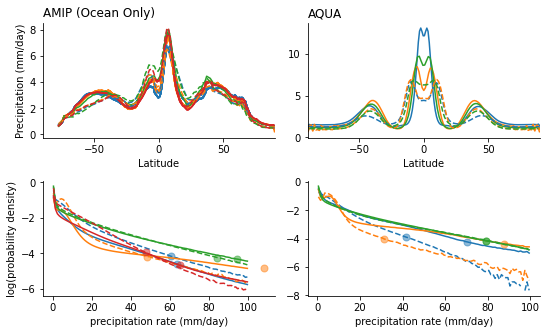

In [162]:
#
# Now can I get the zonal mean and distribution on to one plot
#

fig, axx = plt.subplots(figsize=(mm2inches(190), mm2inches(115)), ncols=2, nrows=2, constrained_layout=True)
ax = axx[0,:]
for ex in ZMnl:
    for m in K[ex]:
        for b in K[ex][m]:
#             print(f"working on {ex} - {m} - {b}")
            xlat = ZMnl[ex][m][b]['lat']
            xzm = ZMnl[ex][m][b]
            c = select_color(m)
            if 'lwoff' in ex:
                ls = 'dashed'
            else:
                ls = 'solid'
            if max(xzm) < 1:
                print(f"WARNING: {ex} - {m} - {b}")
            if 'aqua' in ex:
                a = ax[1]
            else:
                a = ax[0]
            a.plot(xlat, xzm, color=c, linestyle=ls)
ax[0].set_ylabel("Precipitation (mm/day)")
[a.set_xlabel("Latitude") for a in ax]
ax[0].set_title("AMIP (Ocean Only)", loc='left')
ax[1].set_title("AQUA", loc='left')
[a.set_xlim([-90,90]) for a in ax]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]

bctr = ahist_nl['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist_nl['CESM2-amip-r7i1p1f1'][1]) # bin centers are the same for all histograms
ax = axx[1,:]
for i in m_toplot_nl:
#     print(i)
    if 'lwoff' in i:
        linsty = 'dashed'
    else:
        linsty = 'solid'
    if 'aqua' in i:
        a = ax[1]
    else:
        a = ax[0]
    cval = select_color(i)
    a.plot(bctr, np.log10(m_toplot_nl[i]), color=cval, linestyle=linsty, label=i)
    nearest_idx = np.abs(bctr - m_q_nl[i]).argmin()
    print(f"Index: {nearest_idx}, X-Value: {m_q_nl[i]}, Y-Value: {m_toplot_nl[i][nearest_idx]}")
    a.plot(m_q_nl[i], np.log10(m_toplot_nl[i][nearest_idx]), marker='o', alpha=0.5, color=cval, markersize=7)
#     ax.legend(loc='lower left')
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
ax[0].set_ylabel("log(probability density)")
[a.set_xlabel("precipitation rate (mm/day)") for a in ax]

fig.savefig("/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/amip_aqua_zonal_and_pdf_noland.pdf")

In [166]:
%%time
#
# Now we repeat again, but we don't allow "dry days" -- my motivation here is only to try to limit the impact of the very dry subtropics, which might be different sizes in different data
#
# well, kde is super slow, what about just old fashioned histogram
B = np.arange(0, 101, 1)
ahist_nldry = dict()
aquan_nldry = dict()
quantiles = [0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
for ex in K:
    for m in K[ex]:
        for b in K[ex][m]:
            k = "-".join([m,ex,b])
            print(k)
            datmp = (K[ex][m][b]['pr'].sel(lat=slice(-20,20))*86400.).compute()
            if (ex in LAND) and (m in LAND[ex]) and (b in LAND[ex][m]):
                landfrac = LAND[ex][m][b]['sftlf'].sel(lat=slice(-20,20))
                datmp = datmp.where(landfrac <= 0)
            datmp = datmp.where(datmp>=1) # datmp in mm/day, set threshold for "dry day" to 1mm
            arr = datmp.values.flatten()
            weights = np.cos(np.radians(datmp['lat'])).broadcast_like(datmp) 
            ahist_nldry[k] = np.histogram(arr, bins=B, weights=weights.values.flatten(), density=True)
            aquan_nldry[k] = np.nanquantile(arr, quantiles)
            

CESM2-amip-r1i1p1f1
CESM2-amip-r3i1p1f1
CESM2-amip-r5i1p1f1
CESM2-amip-r6i1p1f1
CESM2-amip-r10i1p1f1
CESM2-amip-r8i1p1f1
CESM2-amip-r4i1p1f1
CESM2-amip-r9i1p1f1
CESM2-amip-r2i1p1f1
CESM2-amip-r7i1p1f1
IPSL-CM6A-LR-amip-r1i1p1f1
IPSL-CM6A-LR-amip-r3i1p1f1
IPSL-CM6A-LR-amip-r5i1p1f1
IPSL-CM6A-LR-amip-r6i1p1f1
IPSL-CM6A-LR-amip-r10i1p1f1
IPSL-CM6A-LR-amip-r8i1p1f1
IPSL-CM6A-LR-amip-r4i1p1f1
IPSL-CM6A-LR-amip-r9i1p1f1
IPSL-CM6A-LR-amip-r11i1p1f1
IPSL-CM6A-LR-amip-r2i1p1f1
IPSL-CM6A-LR-amip-r7i1p1f1
CNRM-CM6-1-amip-r1i1p1f2
MRI-ESM2-0-amip-r1i1p1f1
MRI-ESM2-0-amip-r2i1p1f1
MRI-ESM2-0-amip-r3i1p1f1
CESM2-amip-lwoff-r1i1p1f1
IPSL-CM6A-LR-amip-lwoff-r1i1p1f1
CNRM-CM6-1-amip-lwoff-r1i1p1f2
MRI-ESM2-0-amip-lwoff-r1i1p1f1
CESM2-aqua-control-r1i1p1f1
IPSL-CM6A-LR-aqua-control-r1i1p1f1
CNRM-CM6-1-aqua-control-r1i1p1f2
CESM2-aqua-control-lwoff-r1i1p1f1
IPSL-CM6A-LR-aqua-control-lwoff-r1i1p1f1
CNRM-CM6-1-aqua-control-lwoff-r1i1p1f2
CPU times: user 8min 41s, sys: 2min 17s, total: 10min 58s
Wall time: 

CESM2-amip
CESM2-amip-lwoff
CESM2-aqua-control
CESM2-aqua-control-lwoff
IPSL-CM6A-LR-amip
IPSL-CM6A-LR-amip-lwoff
IPSL-CM6A-LR-aqua-control
IPSL-CM6A-LR-aqua-control-lwoff
CNRM-CM6-1-amip
CNRM-CM6-1-amip-lwoff
CNRM-CM6-1-aqua-control
CNRM-CM6-1-aqua-control-lwoff
MRI-ESM2-0-amip
MRI-ESM2-0-amip-lwoff
CPU times: user 131 ms, sys: 16.7 ms, total: 147 ms
Wall time: 237 ms


/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: Runt

Text(0.5, 0, 'precipitation rate (mm/day)')

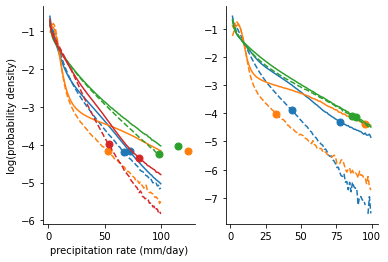

In [168]:
%%time
#
# histograms that combine the amip ensemble members
#
m_combine_nldry = dict()
m_n_nldry = dict()
m_q_nldry = dict()
for m in models:
    for ex in experiments:
        s = "-".join([m,ex])
        m_n_nldry[s] = 0
        for ah in ahist_nldry:
            if (s in ah) and (ah[len(s)+1] == 'r'):
                if s in m_combine_nldry:
                    m_combine_nldry[s].append(ahist_nldry[ah][0])
                    m_q_nldry[s].append(aquan_nldry[ah][-1])
                else:
                    m_combine_nldry[s] = [ahist_nldry[ah][0]]
                    m_q_nldry[s] = [aquan_nldry[ah][-1]]
                m_n_nldry[s] += 1 
m_toplot_nldry = dict()
for m in m_combine_nldry:
    if len(m_combine_nldry[m]) > 1:
        m_toplot_nldry[m] = sum(m_combine_nldry[m])/m_n_nldry[m]
        m_q_nldry[m] = sum(m_q_nldry[m])/m_n_nldry[m]
    else:
        m_toplot_nldry[m] = m_combine_nldry[m][0]
        m_q_nldry[m] = m_q_nldry[m][0]



bctr = ahist_nldry['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist_nldry['CESM2-amip-r7i1p1f1'][1]) # bin centers are the same for all histograms
fig, ax = plt.subplots(ncols=2)
for i in m_toplot:
    print(i)
    if 'lwoff' in i:
        linsty = 'dashed'
    else:
        linsty = 'solid'
    if 'aqua' in i:
        a = ax[1]
    else:
        a = ax[0]
    cval = select_color(i)
    a.plot(bctr, np.log10(m_toplot_nldry[i]), color=cval, linestyle=linsty, label=i)
    nearest_idx = np.abs(bctr - m_q_nldry[i]).argmin()
    a.plot(m_q_nldry[i], np.log10(m_toplot_nldry[i][nearest_idx]), marker='o', color=cval, markersize=7)
#     ax.legend(loc='lower left')
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
ax[0].set_ylabel("log(probability density)")
ax[0].set_xlabel("precipitation rate (mm/day)")

In [170]:
%%time
#
# A different way to try to remove subtropics is to mask based on mean precipitation, which has the advantage of keeping deep tropical dry days
# Just apply common rule-of-thumb of 4mm/day
#
B = np.arange(0, 101, 1)
ahist_nl4mm = dict()
aquan_nl4mm = dict()
quantiles = [0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
for ex in K:
    for m in K[ex]:
        for b in K[ex][m]:
            k = "-".join([m,ex,b])
            print(k)
            datmp = (K[ex][m][b]['pr'].sel(lat=slice(-20,20))*86400.).compute()
            datmpclimo = datmp.mean(dim='time')
            if (ex in LAND) and (m in LAND[ex]) and (b in LAND[ex][m]):
                landfrac = LAND[ex][m][b]['sftlf'].sel(lat=slice(-20,20))
                datmp = datmp.where(landfrac <= 0)
            datmp = datmp.where(datmpclimo>=4) # datmp in mm/day, set threshold of 4mm/day for "Tropics"
            arr = datmp.values.flatten()
            weights = np.cos(np.radians(datmp['lat'])).broadcast_like(datmp) 
            ahist_nl4mm[k] = np.histogram(arr, bins=B, weights=weights.values.flatten(), density=True)
            aquan_nl4mm[k] = np.nanquantile(arr, quantiles)

CESM2-amip-r1i1p1f1
CESM2-amip-r3i1p1f1
CESM2-amip-r5i1p1f1
CESM2-amip-r6i1p1f1
CESM2-amip-r10i1p1f1
CESM2-amip-r8i1p1f1
CESM2-amip-r4i1p1f1
CESM2-amip-r9i1p1f1
CESM2-amip-r2i1p1f1
CESM2-amip-r7i1p1f1
IPSL-CM6A-LR-amip-r1i1p1f1
IPSL-CM6A-LR-amip-r3i1p1f1
IPSL-CM6A-LR-amip-r5i1p1f1
IPSL-CM6A-LR-amip-r6i1p1f1
IPSL-CM6A-LR-amip-r10i1p1f1
IPSL-CM6A-LR-amip-r8i1p1f1
IPSL-CM6A-LR-amip-r4i1p1f1
IPSL-CM6A-LR-amip-r9i1p1f1
IPSL-CM6A-LR-amip-r11i1p1f1
IPSL-CM6A-LR-amip-r2i1p1f1
IPSL-CM6A-LR-amip-r7i1p1f1
CNRM-CM6-1-amip-r1i1p1f2
MRI-ESM2-0-amip-r1i1p1f1
MRI-ESM2-0-amip-r2i1p1f1
MRI-ESM2-0-amip-r3i1p1f1
CESM2-amip-lwoff-r1i1p1f1
IPSL-CM6A-LR-amip-lwoff-r1i1p1f1
CNRM-CM6-1-amip-lwoff-r1i1p1f2
MRI-ESM2-0-amip-lwoff-r1i1p1f1
CESM2-aqua-control-r1i1p1f1
IPSL-CM6A-LR-aqua-control-r1i1p1f1
CNRM-CM6-1-aqua-control-r1i1p1f2
CESM2-aqua-control-lwoff-r1i1p1f1
IPSL-CM6A-LR-aqua-control-lwoff-r1i1p1f1
CNRM-CM6-1-aqua-control-lwoff-r1i1p1f2
CPU times: user 8min 17s, sys: 2min 18s, total: 10min 35s
Wall time: 

CESM2-amip
CESM2-amip-lwoff
CESM2-aqua-control
CESM2-aqua-control-lwoff
IPSL-CM6A-LR-amip
IPSL-CM6A-LR-amip-lwoff
IPSL-CM6A-LR-aqua-control
IPSL-CM6A-LR-aqua-control-lwoff
CNRM-CM6-1-amip
CNRM-CM6-1-amip-lwoff
CNRM-CM6-1-aqua-control
CNRM-CM6-1-aqua-control-lwoff
MRI-ESM2-0-amip
MRI-ESM2-0-amip-lwoff
CPU times: user 76.9 ms, sys: 71.1 ms, total: 148 ms
Wall time: 271 ms


/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/brianpm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'precipitation rate (mm/day)')

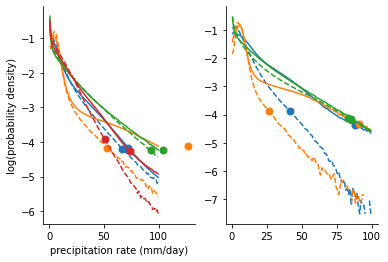

In [171]:
%%time
#
# histograms that combine the amip ensemble members
#
m_combine_nl4mm = dict()
m_n_nl4mm = dict()
m_q_nl4mm = dict()
for m in models:
    for ex in experiments:
        s = "-".join([m,ex])
        m_n_nl4mm[s] = 0
        for ah in ahist_nl4mm:
            if (s in ah) and (ah[len(s)+1] == 'r'):
                if s in m_combine_nl4mm:
                    m_combine_nl4mm[s].append(ahist_nl4mm[ah][0])
                    m_q_nl4mm[s].append(aquan_nl4mm[ah][-1])
                else:
                    m_combine_nl4mm[s] = [ahist_nl4mm[ah][0]]
                    m_q_nl4mm[s] = [aquan_nl4mm[ah][-1]]
                m_n_nl4mm[s] += 1 
m_toplot_nl4mm = dict()
for m in m_combine_nl4mm:
    if len(m_combine_nl4mm[m]) > 1:
        m_toplot_nl4mm[m] = sum(m_combine_nl4mm[m])/m_n_nl4mm[m]
        m_q_nl4mm[m] = sum(m_q_nl4mm[m])/m_n_nl4mm[m]
    else:
        m_toplot_nl4mm[m] = m_combine_nl4mm[m][0]
        m_q_nl4mm[m] = m_q_nl4mm[m][0]



bctr = ahist_nl4mm['CESM2-amip-r7i1p1f1'][1][0:-1] + 0.5*np.diff(ahist_nl4mm['CESM2-amip-r7i1p1f1'][1]) # bin centers are the same for all histograms
fig, ax = plt.subplots(ncols=2)
for i in m_toplot:
    print(i)
    if 'lwoff' in i:
        linsty = 'dashed'
    else:
        linsty = 'solid'
    if 'aqua' in i:
        a = ax[1]
    else:
        a = ax[0]
    cval = select_color(i)
    a.plot(bctr, np.log10(m_toplot_nl4mm[i]), color=cval, linestyle=linsty, label=i)
    nearest_idx = np.abs(bctr - m_q_nl4mm[i]).argmin()
    a.plot(m_q_nl4mm[i], np.log10(m_toplot_nl4mm[i][nearest_idx]), marker='o', color=cval, markersize=7)
#     ax.legend(loc='lower left')
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
ax[0].set_ylabel("log(probability density)")
ax[0].set_xlabel("precipitation rate (mm/day)")

In [172]:
aquan_nl4mm

{'CESM2-amip-r1i1p1f1': array([ 3.17018795,  7.21953297, 14.26799936, 21.8773632 , 42.2167318 ,
        72.01569913]),
 'CESM2-amip-r3i1p1f1': array([ 3.14798844,  7.20434427, 14.28914356, 21.96644602, 42.47471722,
        72.79954743]),
 'CESM2-amip-r5i1p1f1': array([ 3.16638923,  7.22335386, 14.31626997, 21.98626137, 42.46724972,
        72.6063737 ]),
 'CESM2-amip-r6i1p1f1': array([ 3.17291427,  7.22932005, 14.3011055 , 21.94252672, 42.39194771,
        72.24495023]),
 'CESM2-amip-r10i1p1f1': array([ 3.17488718,  7.25021958, 14.37227821, 22.06069441, 42.61854172,
        72.41149641]),
 'CESM2-amip-r8i1p1f1': array([ 3.16059864,  7.21264696, 14.26431894, 21.87402296, 42.2167057 ,
        72.05730839]),
 'CESM2-amip-r4i1p1f1': array([ 3.16619873,  7.22465503, 14.32365608, 21.99637213, 42.50555092,
        72.61707967]),
 'CESM2-amip-r9i1p1f1': array([ 3.16254079,  7.20245016, 14.24806604, 21.88762741, 42.36905548,
        72.02377172]),
 'CESM2-amip-r2i1p1f1': array([ 3.16123354,  7.

In [153]:
(barland[100,:,:]-barland[41,:,:]).max()

<xarray.DataArray 'sftlf' ()>
array(0., dtype=float32)

In [200]:
K['aqua-control'][m]

{'r1i1p1f2': <xarray.Dataset>
 Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, time: 3653)
 Coordinates:
   * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
   * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
   * time         (time) datetime64[ns] 1979-01-01T12:00:00 ... 1988-12-31T12:00:00
 Dimensions without coordinates: axis_nbounds
 Data variables:
     time_bounds  (time, axis_nbounds) datetime64[ns] ...
     pr           (time, lat, lon) float32 9.652909e-06 ... 4.525816e-06
 Attributes:
     Conventions:           CF-1.7 CMIP-6.2
     creation_date:         2018-09-20T17:03:41Z
     description:           Extended version of CMIP5/CFMIP-2 aquaControl expe...
     title:                 CNRM-CM6-1 model output prepared for CMIP6 / CFMIP...
     activity_id:           CFMIP
     contact:               contact.cmip@meteo.fr
     data_specs_version:    01.00.21
     dr2xml_version:        1.13
     experiment_id:   

In [183]:
from scipy.ndimage import label, generate_binary_structure

In [207]:
# i'm curious about whether we can do very simplistic "BLOB" detection 
m = "CNRM-CM6-1"
r = "r1i1p1f2"
foo = K['aqua-control'][m][r]['pr'] * 86400.
foo_mask = foo.where(foo >= aquan_nl4mm[f'{m}-aqua-control-{r}'][-2])

In [219]:
%%time
labeled_arrays = []
n_features = []
for t in foo_mask['time']:
    la, nf = label(foo_mask.sel(time=t).values, structure=generate_binary_structure(2,2))
    la = xr.DataArray(la, dims=("lat","lon"), coords={"lat":foo.lat, "lon":foo.lon})
    labeled_arrays.append(la)
    n_features.append(nf)


CPU times: user 6.52 s, sys: 332 ms, total: 6.85 s
Wall time: 6.76 s


In [220]:
# provides a quick & dirty count of precipitating features:
nf

1

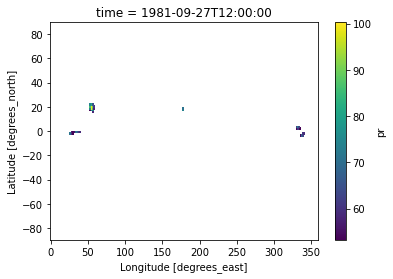

In [221]:
foo_mask.isel(time=1000).plot.pcolormesh()

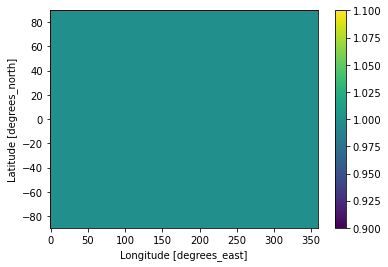

In [222]:
labeled_arrays[1000].plot.pcolormesh()

In [223]:
label

<function scipy.ndimage.measurements.label(input, structure=None, output=None)>

In [5]:
import numpy as np
q = np.linspace(0.01, 0.99, 99) 
q = np.append(q, [0.999, 0.9999])

In [6]:
q

array([0.01  , 0.02  , 0.03  , 0.04  , 0.05  , 0.06  , 0.07  , 0.08  ,
       0.09  , 0.1   , 0.11  , 0.12  , 0.13  , 0.14  , 0.15  , 0.16  ,
       0.17  , 0.18  , 0.19  , 0.2   , 0.21  , 0.22  , 0.23  , 0.24  ,
       0.25  , 0.26  , 0.27  , 0.28  , 0.29  , 0.3   , 0.31  , 0.32  ,
       0.33  , 0.34  , 0.35  , 0.36  , 0.37  , 0.38  , 0.39  , 0.4   ,
       0.41  , 0.42  , 0.43  , 0.44  , 0.45  , 0.46  , 0.47  , 0.48  ,
       0.49  , 0.5   , 0.51  , 0.52  , 0.53  , 0.54  , 0.55  , 0.56  ,
       0.57  , 0.58  , 0.59  , 0.6   , 0.61  , 0.62  , 0.63  , 0.64  ,
       0.65  , 0.66  , 0.67  , 0.68  , 0.69  , 0.7   , 0.71  , 0.72  ,
       0.73  , 0.74  , 0.75  , 0.76  , 0.77  , 0.78  , 0.79  , 0.8   ,
       0.81  , 0.82  , 0.83  , 0.84  , 0.85  , 0.86  , 0.87  , 0.88  ,
       0.89  , 0.9   , 0.91  , 0.92  , 0.93  , 0.94  , 0.95  , 0.96  ,
       0.97  , 0.98  , 0.99  , 0.999 , 0.9999])